In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,370360,0,0,76561198021765300,68,1,1,52.1,"October 31, 2021",This is in my top 5 favorite assembly language...
1,370360,1,0,76561197999604233,134,1,1,147.1,"October 29, 2021",Trying out different solutions and competing w...
2,370360,0,0,novicealchemist,134,9,1,18.8,"October 25, 2021",I give this game a lukewarm recommendationIf y...
3,370360,0,0,76561198420087467,45,3,1,277.8,"October 20, 2021","Fun and challenging, but could prove difficult..."
4,370360,4,4,EngiRaptor,176,23,1,7.4,"October 20, 2021",I took computer science in university for 5 se...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,52.1,"October 31, 2021",This is in my top 5 favorite assembly language...
1,1,0,1,147.1,"October 29, 2021",Trying out different solutions and competing w...
2,0,0,1,18.8,"October 25, 2021",I give this game a lukewarm recommendationIf y...
3,0,0,1,277.8,"October 20, 2021","Fun and challenging, but could prove difficult..."
4,4,4,1,7.4,"October 20, 2021",I took computer science in university for 5 se...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 31, 2021",This is in my top 5 favorite assembly language...,0,0,52.1,1
1,"October 29, 2021",Trying out different solutions and competing w...,1,0,147.1,1
2,"October 25, 2021",I give this game a lukewarm recommendationIf y...,0,0,18.8,1
3,"October 20, 2021","Fun and challenging, but could prove difficult...",0,0,277.8,1
4,"October 20, 2021",I took computer science in university for 5 se...,4,4,7.4,1
5,"October 18, 2021","Haven't even finished the second row yet, supe...",0,0,6.9,1
6,"October 17, 2021",This game helped me learn assembly while I was...,1,4,100.2,1
7,"October 16, 2021",First few puzzles let me remember the joy of a...,0,0,14.3,1
8,"October 15, 2021",MOV MONEY GAME\nTOP:\n MOV TOLERANCE ACC\nPLAY...,9,1,7.7,1
9,"October 10, 2021","Aight, the games hella fun and a real brain ti...",1,5,1.4,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  2060 non-null   object 
 1   Review_Text     2056 non-null   object 
 2   Num_Helpful     2060 non-null   int64  
 3   Num_Funny       2060 non-null   int64  
 4   Hours_Played    2060 non-null   float64
 5   Recommend       2060 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 96.7+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_23136/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 31, 2021",This is in my top 5 favorite assembly language...,0,0,52.1,1,1635638400
1,"October 29, 2021",Trying out different solutions and competing w...,1,0,147.1,1,1635465600
2,"October 25, 2021",I give this game a lukewarm recommendationIf y...,0,0,18.8,1,1635120000
3,"October 20, 2021","Fun and challenging, but could prove difficult...",0,0,277.8,1,1634688000
4,"October 20, 2021",I took computer science in university for 5 se...,4,4,7.4,1,1634688000


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_23136/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 31, 2021",This is in my top 5 favorite assembly language...,0,0,52.1,1,1635638400,2704
1,"October 29, 2021",Trying out different solutions and competing w...,1,0,147.1,1,1635465600,2704
2,"October 25, 2021",I give this game a lukewarm recommendationIf y...,0,0,18.8,1,1635120000,2703
3,"October 20, 2021","Fun and challenging, but could prove difficult...",0,0,277.8,1,1634688000,2702
4,"October 20, 2021",I took computer science in university for 5 se...,4,4,7.4,1,1634688000,2702


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 31, 2021",This is in my top 5 favorite assembly language...,0,0,52.1,1,1635638400,2704
1,"October 29, 2021",Trying out different solutions and competing w...,1,0,147.1,1,1635465600,2704
2,"October 25, 2021",I give this game a lukewarm recommendationIf y...,0,0,18.8,1,1635120000,2703
3,"October 20, 2021","Fun and challenging, but could prove difficult...",0,0,277.8,1,1634688000,2702
4,"October 20, 2021",I took computer science in university for 5 se...,4,4,7.4,1,1634688000,2702


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2704,"October 31, 2021",This is in my top 5 favorite assembly language...
1,2704,"October 29, 2021",Trying out different solutions and competing w...
2,2703,"October 25, 2021",I give this game a lukewarm recommendationIf y...
3,2702,"October 20, 2021","Fun and challenging, but could prove difficult..."
4,2702,"October 20, 2021",I took computer science in university for 5 se...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2369,"June 1, 2015",20
1,2369,"June 2, 2015",10
2,2369,"June 3, 2015",14
3,2370,"June 10, 2015",15
4,2370,"June 4, 2015",12
...,...,...,...
946,2702,"October 18, 2021",1
947,2702,"October 20, 2021",2
948,2703,"October 25, 2021",1
949,2704,"October 29, 2021",1


<AxesSubplot:>

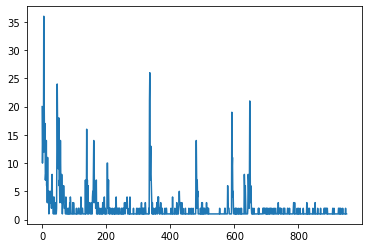

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

2060

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

2.166140904311251

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2369,44
1,2370,131
2,2371,54
3,2372,30
4,2373,27
...,...,...
314,2700,4
315,2701,2
316,2702,6
317,2703,1


<AxesSubplot:>

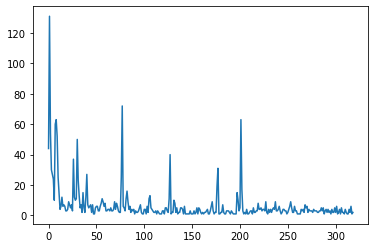

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

2060

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

6.4576802507836994

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 31, 2021",This is in my top 5 favorite assembly language...,0,0,52.1,1,1635638400,2704
1,"October 29, 2021",Trying out different solutions and competing w...,1,0,147.1,1,1635465600,2704
2,"October 25, 2021",I give this game a lukewarm recommendationIf y...,0,0,18.8,1,1635120000,2703
3,"October 20, 2021","Fun and challenging, but could prove difficult...",0,0,277.8,1,1634688000,2702
4,"October 20, 2021",I took computer science in university for 5 se...,4,4,7.4,1,1634688000,2702


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2369,635
1,2370,1297
2,2371,348
3,2372,157
4,2373,60
...,...,...
314,2700,10
315,2701,1
316,2702,14
317,2703,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2369,107,0,5.0,14.431818
2370,335,0,0.0,9.900763
2371,148,0,0.0,6.444444
2372,58,0,0.0,5.233333
2373,28,0,0.0,2.222222
...,...,...,...,...
2700,5,0,2.5,2.500000
2701,1,0,0.5,0.500000
2702,9,0,0.5,2.333333


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

9665

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

4.691747572815534

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2369,217
1,2370,1228
2,2371,416
3,2372,171
4,2373,19
...,...,...
314,2700,5
315,2701,5
316,2702,9
317,2703,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2369,47,0,1.5,4.931818
2370,545,0,0.0,9.374046
2371,387,0,0.0,7.703704
2372,99,0,0.0,5.700000
2373,10,0,0.0,0.703704
...,...,...,...,...
2700,4,0,0.5,1.250000
2701,5,0,2.5,2.500000
2702,4,0,0.5,1.500000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

7123

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

3.457766990291262

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2369,991.7
1,2370,3362.0
2,2371,2700.6
3,2372,710.4
4,2373,766.2
...,...,...
314,2700,203.2
315,2701,10.0
316,2702,414.3
317,2703,18.8


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2369,125.7,0.9,13.90,22.538636
2370,431.9,0.8,13.90,25.664122
2371,509.7,0.6,17.70,50.011111
2372,122.7,3.5,20.85,23.680000
2373,294.3,0.9,11.40,28.377778
...,...,...,...,...
2700,149.6,0.1,26.75,50.800000
2701,8.6,1.4,5.00,5.000000
2702,277.8,6.9,11.00,69.050000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

60372.6

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

29.30708737864074

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2369,1.000000
1,2370,1.000000
2,2371,0.962963
3,2372,1.000000
4,2373,1.000000
...,...,...
314,2700,0.500000
315,2701,1.000000
316,2702,1.000000
317,2703,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2369,1,1,1.0,1.000000
2370,1,1,1.0,1.000000
2371,1,-1,1.0,0.962963
2372,1,1,1.0,1.000000
2373,1,1,1.0,1.000000
...,...,...,...,...
2700,1,-1,1.0,0.500000
2701,1,1,1.0,1.000000
2702,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

1960

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.9514563106796117

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 31, 2021",This is in my top 5 favorite assembly language...,0,0,52.1,1,1635638400,2704
1,"October 29, 2021",Trying out different solutions and competing w...,1,0,147.1,1,1635465600,2704
2,"October 25, 2021",I give this game a lukewarm recommendationIf y...,0,0,18.8,1,1635120000,2703
3,"October 20, 2021","Fun and challenging, but could prove difficult...",0,0,277.8,1,1634688000,2702
4,"October 20, 2021",I took computer science in university for 5 se...,4,4,7.4,1,1634688000,2702


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 31, 2021",This is in my top 5 favorite assembly language...,0,0,0.070537,1.0,1.000000,2704
1,"October 29, 2021",Trying out different solutions and competing w...,1,0,0.199403,1.0,0.999147,2704
2,"October 25, 2021",I give this game a lukewarm recommendationIf y...,0,0,0.025366,1.0,0.997440,2703
3,"October 20, 2021","Fun and challenging, but could prove difficult...",0,0,0.376696,1.0,0.995307,2702
4,"October 20, 2021",I took computer science in university for 5 se...,4,4,0.009902,1.0,0.995307,2702
...,...,...,...,...,...,...,...,...
2055,"June 5, 2015",Another amazing optimization puzzler from Zach...,0,0,0.007189,1.0,0.001706,2370
2056,"June 5, 2015",Just picked this up and having a BLAST. I enjo...,0,0,0.068909,1.0,0.001706,2370
2057,"June 5, 2015","+ A game so simple, yet infinitly complicated....",0,0,0.041508,1.0,0.001706,2370
2058,"June 5, 2015",It's another Zachtronics puzzle game.This time...,0,0,0.094004,1.0,0.001706,2370


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_23136/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 31, 2021",This is in my top 5 favorite assembly language...,0,0,0.070537,1.0,1.000000,2704
1,"October 29, 2021",Trying out different solutions and competing w...,1,0,0.199403,1.0,0.999147,2704
2,"October 25, 2021",I give this game a lukewarm recommendationIf y...,0,0,0.025366,1.0,0.997440,2703
3,"October 20, 2021","Fun and challenging, but could prove difficult...",0,0,0.376696,1.0,0.995307,2702
4,"October 20, 2021",I took computer science in university for 5 se...,4,4,0.009902,1.0,0.995307,2702
5,"October 18, 2021","Haven't even finished the second row yet, supe...",0,0,0.009224,1.0,0.994454,2702
6,"October 17, 2021",This game helped me learn assembly while I was...,1,4,0.135784,1.0,0.994027,2702
7,"October 16, 2021",First few puzzles let me remember the joy of a...,0,0,0.019262,1.0,0.993601,2702
8,"October 15, 2021",MOV MONEY GAME\nTOP:\n MOV TOLERANCE ACC\nPLAY...,9,1,0.010309,1.0,0.993174,2702
9,"October 10, 2021","Aight, the games hella fun and a real brain ti...",1,5,0.001763,1.0,0.991041,2701


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2369    [The hardest puzzle game I've ever played.I'm ...
2370    [Cyberpunk fun! TIS-100 is a game for programm...
2371    [This game is weirdly nostalgic.  I'm a softwa...
2372    [I don't write reviews often but when I do, th...
2373    [Zachtronics mission statement seems to read:1...
2374    [http://i.imgur.com/fuu7Gw7.png, Fun take on p...
2375    [BESTGAMEEVER(ok, shares the podium with ksp),...
2376    [As a programmer, this game is a wonderful min...
2377    [If you like programming and puzzles, this gam...
2378    [That this game is not installed on every scho...
2379    [This game is wonderful!  I've blown through t...
2380    [A True Challenge anyone can complete with eno...
2381    [It's HARD! Even if you understand assembly :o...
2382    [The TIS-100 makes computing visceral, and I t...
2383    [Super fun! Would recommend to anyone who want...
2384    [This game will be enjoyable if you like progr...
2385    [An absolutely wonderful puzzle game that ever..

In [52]:
# storing data in JSON format
df_text_list.to_json('TIS100_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('TIS100_text.json')
print(game_text)

            name  index                                               data
0    Review_Text   2369  [The hardest puzzle game I've ever played.I'm ...
1    Review_Text   2370  [Cyberpunk fun! TIS-100 is a game for programm...
2    Review_Text   2371  [This game is weirdly nostalgic.  I'm a softwa...
3    Review_Text   2372  [I don't write reviews often but when I do, th...
4    Review_Text   2373  [Zachtronics mission statement seems to read:1...
5    Review_Text   2374  [http://i.imgur.com/fuu7Gw7.png, Fun take on p...
6    Review_Text   2375  [BESTGAMEEVER(ok, shares the podium with ksp),...
7    Review_Text   2376  [As a programmer, this game is a wonderful min...
8    Review_Text   2377  [If you like programming and puzzles, this gam...
9    Review_Text   2378  [That this game is not installed on every scho...
10   Review_Text   2379  [This game is wonderful!  I've blown through t...
11   Review_Text   2380  [A True Challenge anyone can complete with eno...
12   Review_Text   2381  

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('TIS100_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_23136/1541612076.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('TIS100_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_23136/3940598928.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('TIS100_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])